<a href="https://colab.research.google.com/github/Eslam-elnahas/My-Project-/blob/main/satellite_imagery_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Coding of Data preparation **

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install patchify


In [4]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import random
from tensorflow.keras.utils import to_categorical


In [5]:
minmaxscaler = MinMaxScaler()

In [6]:
!ls -lah '/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset'

total 33K
-rw------- 1 root root  548 May 29  2020  classes.json
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 1'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 2'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 3'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 4'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 5'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 6'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 7'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 8'


In [7]:
dataset_root_folder = '/content/drive/MyDrive/Colab Notebooks/datasets/Satellite'

In [8]:
dataset_name = 'DubaiDataset'

In [9]:
for path,subdirs,files in os.walk(os.path.join(dataset_root_folder,dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
 #print(dir_name)
  if dir_name == 'masks': #images
   images=os.listdir(path)
   print(path)
   #print(images)
   for i,image_name in enumerate(images):
    if image_name.endswith('.png'): #jpg
     #print(image_name)
     a=True

/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 2/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 8/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 3/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 4/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 1/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 6/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 5/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 7/masks


In [10]:
image_patch_size=256

In [11]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [12]:
image.shape

(544, 509, 3)

In [13]:
image_patches=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)

تستخدم لإنشاء "قطع" أو "شرائح" من الصورة الأصلية باستخدام patchifyمكتبة  patchify



In [14]:
len(image_patches)

2

In [15]:
print (image_patches.shape)

(2, 1, 1, 256, 256, 3)


In [16]:
image_x=image_patches[0,0,:,:]
#MinMaxScalar
image_y=minmaxscaler.fit_transform(image_x.reshape(-1,image_x.shape[-1])).reshape(image_x.shape)

In [17]:
image_y[0].shape

(256, 256, 3)

In [18]:
print(type(image))

<class 'numpy.ndarray'>


In [19]:
type(Image.fromarray(image))

PIL.Image.Image

In [20]:
image.shape

(544, 509, 3)

In [21]:
(image.shape[1]//image_patch_size)*image_patch_size

256

In [22]:
image_dataset=[]
mask_dataset=[]
for image_type in ['images','masks']:
  if image_type=='images':
   image_extestion='jpg'
  elif image_type=='masks':
   image_extestion='png'
  for tile_id in range(1,8):
    for image_id in range (1,20):
      image =cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extestion}',1)
      if image is not None:
        if image_type=='masks':
         image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x=(image.shape[1]//image_patch_size)*image_patch_size
        size_y=(image.shape[0]//image_patch_size)*image_patch_size
        #print('{}---- {} -- {}'.format(image.shape,size_x,size_y))
        image=Image.fromarray(image)
        image=image.crop((0,0,size_x,size_y))
        #print('{} , {}'.format(image.size[0],image.size[1]))
        image=np.array(image)
        patched_images=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type=='images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image =individual_patched_image [0]
              #print(individual_patched_image )
              image_dataset.append(individual_patched_image)
            elif image_type=='masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask=individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)

In [23]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [24]:
mask_dataset=np.array(mask_dataset)
image_dataset=np.array(image_dataset)

In [25]:
type(image_dataset[0])

numpy.ndarray

In [26]:
type(np.reshape(image_dataset[0],image_patch_size*image_patch_size*3))

numpy.ndarray

In [27]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


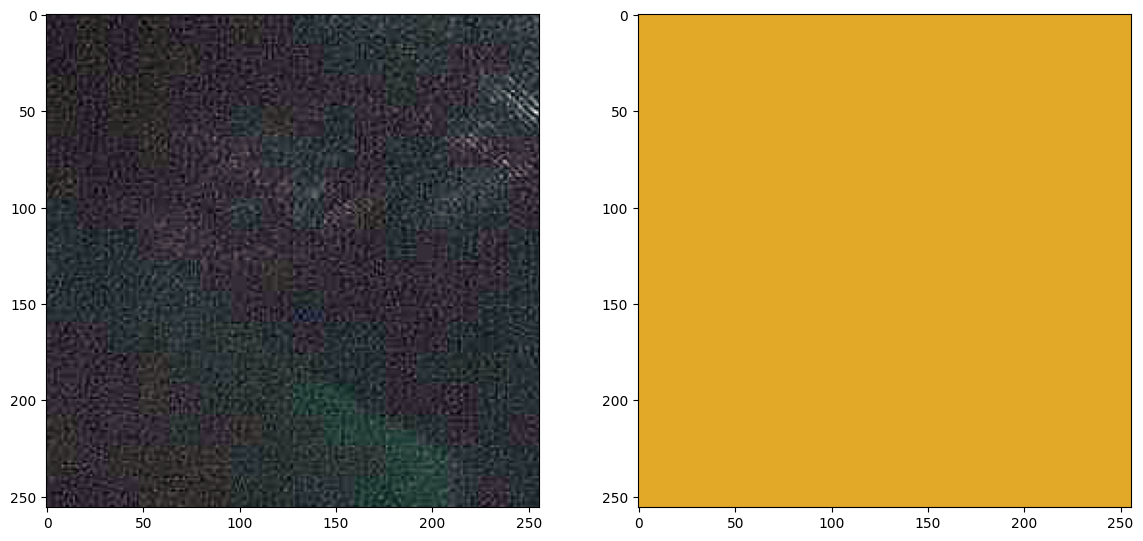

In [28]:

random_image_id=random.randint(0,len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [29]:
class_building='#3C1098'
class_building=class_building.lstrip('#')
#3C1098
class_building=np.array(tuple(int(class_building[i:i+2],16) for i in (0,2,4)))
print(class_building)

class_land='#8429F6'
class_land=class_land.lstrip('#')
#8429F6
class_land=np.array(tuple(int(class_land[i:i+2],16) for i in (0,2,4)))
print(class_land)

class_road='#6EC1E4'
class_road=class_road.lstrip('#')
#6EC1E4
class_road=np.array(tuple(int(class_road[i:i+2],16) for i in (0,2,4)))
print(class_road)


class_Vegetation='#FEDD3A'
class_Vegetation=class_Vegetation.lstrip('#')
#FEDD3A
class_Vegetation=np.array(tuple(int(class_Vegetation[i:i+2],16) for i in (0,2,4)))
print(class_Vegetation)

class_Water='#E2A929'
class_Water=class_Water.lstrip('#')
#E2A929
class_Water=np.array(tuple(int(class_Water[i:i+2],16) for i in (0,2,4)))
print(class_Water)


class_Unlabeled='#9B9B9B'
class_Unlabeled=class_Unlabeled.lstrip('#')
#9B9B9B
class_Unlabeled=np.array(tuple(int(class_Unlabeled[i:i+2],16) for i in (0,2,4)))
print(class_Unlabeled)



[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [30]:
mask_dataset.shape[0]

945

In [31]:
label=individual_patched_mask

In [32]:
def rgb_to_label(label):
  label_segment=np.zeros(label.shape,dtype=np.uint8)
  label_segment[np.all(label==class_Water,axis=-1)]=0
  label_segment[np.all(label==class_land,axis=-1)]=1
  label_segment[np.all(label==class_road,axis=-1)]=2
  label_segment[np.all(label==class_building,axis=-1)]=3
  label_segment[np.all(label==class_Vegetation,axis=-1)]=4
  label_segment[np.all(label==class_Unlabeled,axis=-1)]=5
  #print(label_segment)
  label_segment=label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [33]:
labels=[]
for i in range (mask_dataset.shape[0]):
  label=rgb_to_label(mask_dataset[i])
  labels.append(label)

In [34]:
print(len(labels))

945


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
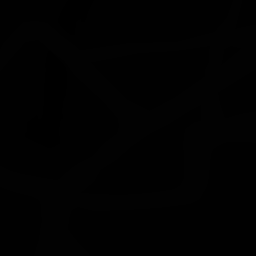

In [35]:
labels[3]

In [36]:
labels=np.expand_dims(labels,axis=3)

In [37]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [38]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [39]:
print('The label unique value is: ',format(np.unique(labels)))

The label unique value is:  [0 1 2 3 4 5]


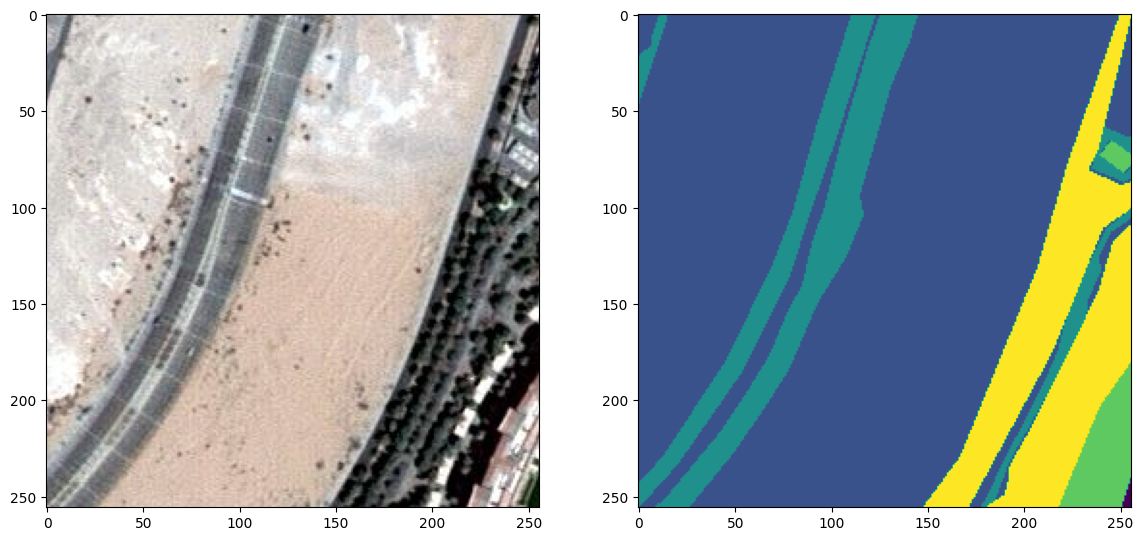

In [40]:

random_image_id = random.randint(0, len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
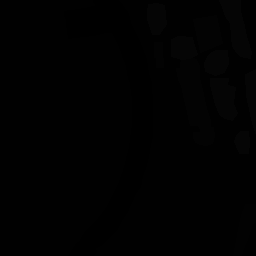

In [41]:
labels[0][:,:,0]

In [42]:
total_classes=len(np.unique(labels))

In [43]:
total_classes

6

In [44]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [45]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [46]:
master_trianing_dataset = image_dataset


In [47]:
master_trianing_dataset.shape

(945, 256, 256, 3)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(master_trianing_dataset ,labels_categorical_dataset, test_size=0.15, random_state=100)



In [49]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [50]:
image_height = x_train.shape[1]
image_width = x_train.shape[2]
image_channels = x_train.shape[3]
total_classes = y_train.shape[3]

In [51]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)


256
256
3
6


#Coding of Deep learning Model

In [52]:
!pip install -U segmentation-models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.7 MB/s eta 0:00:00


In [53]:
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [54]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [55]:
from keras import backend as K

In [56]:
def Jaccard_coef(y_true,y_pred):
  y_true_flatten=K.flatten(y_true)
  y_pred_flatten=K.flatten(y_pred)
  intersection=K.sum(y_true_flatten*y_pred_flatten)
  final_coef_value=(intersection + 1.0 )/ (K.sum (y_true_flatten) + K.sum (y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [57]:
def multi_unet_model(n_classes=5,image_height=256,image_width=256,image_channels=1):
  inputs=Input((image_height,image_width,image_channels))
  source_input = inputs
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)


  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)


  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)
  model = Model(inputs=[inputs], outputs=[outputs])
  return model


In [58]:
metrics = ["accuracy", Jaccard_coef]


In [59]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)


256
256
3
6


In [60]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [61]:
model = get_deep_learning_model()

#create Loss Funcation

*   dice loss > Focal Loss > Total Loss

*   Total Loss = (Dice loss + (1*Focal Loss))



In [62]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [63]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [64]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [65]:
total_loss = dice_loss + (1 * focal_loss)


#Model compilation


In [67]:
import tensorflow as tf

In [68]:
tf.keras.backend.clear_session()


In [69]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [70]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 16)   │            448 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256, 256, 16)   │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 16)   │          2,320 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 16)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 32)   │          4,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128, 128, 32)   │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 32)   │          9,248 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 32)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 64, 64, 64)     │              0 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 32, 32, 64)     │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 32, 32, 128)    │         73,856 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 32, 32, 128)    │              0 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 128)    │        147,584 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 16, 16, 128)    │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)    

 Total params: 1,941,190 (7.41 MB)

 Trainable params: 1,941,190 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
!pip install pydot
!apt-get install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [72]:
from tensorflow.keras.utils import plot_model
import pydot
import graphviz

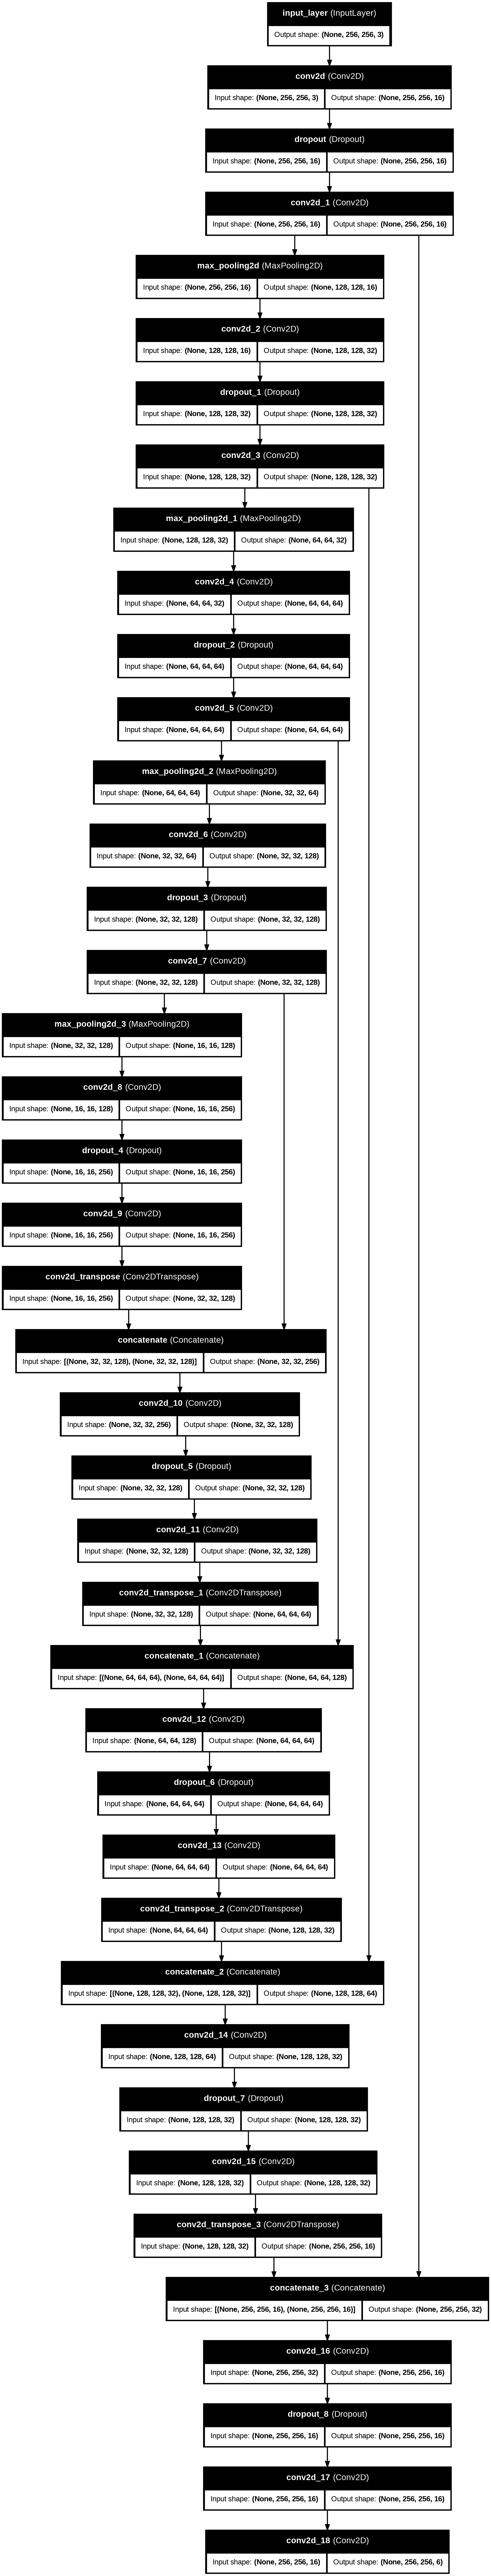

In [73]:
plot_model(model, to_file='Satellite_model_plot.png', show_shapes=True, show_layer_names=True)

In [76]:
!pip install  ipython

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.9/817.9 kB 37.2 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.7.1
    Uninstalling traitlets-5.7.1:
      Successfully uninstalled traitlets-5.7.1
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.26.0 which is incompatible.


In [ ]:
from IPython.display import clear_output

In [75]:
from IPython import clear_output
%matplotlib inline


ImportError: cannot import name 'clear_output' from 'IPython' (/usr/local/lib/python3.10/dist-packages/IPython/__init__.py)

In [73]:
# class plot_loss(keras.callbacks.Callback):
#   def on_train_begin(self, logs={}):
#     self.i=0
#     self.x = []
#     self.losses = []
#     self.val_losses = []
#     self.fig = plt.figure()
#     self.logs =[]

#   def on_epoch_end(self, epoch, logs={}):
#     self.logs.append(logs)
#     self.x.append(self.i)
#     self.losses.append(logs.get('loss'))
#     self.val_losses.append(logs.get('val_loss'))
#     self.i += 1
#
#     clear_output(wait=True)
#     plt.plot(self.x, self.losses, label="loss")
#     plt.plot(self.x, self.val_losses, label="Val_loss")
#     plt.legend()
#     plt.show();

# plot_loss=plot_loss()

In [74]:
model_history = model.fit(x_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=100,
                          validation_data=(x_test, y_test),
                          #callbacks=[plot_loss],
                          shuffle=False)

Epoch 1/100
51/51 [==============================] - 91s 2s/step - loss: 1.0033 - accuracy: 0.5117 - Jaccard_coef: 0.2450 - val_loss: 0.9924 - val_accuracy: 0.6017 - val_Jaccard_coef: 0.3136
Epoch 2/100
51/51 [==============================] - 84s 2s/step - loss: 0.9847 - accuracy: 0.6664 - Jaccard_coef: 0.3555 - val_loss: 0.9802 - val_accuracy: 0.7111 - val_Jaccard_coef: 0.3360
Epoch 3/100
51/51 [==============================] - 84s 2s/step - loss: 0.9638 - accuracy: 0.7199 - Jaccard_coef: 0.4547 - val_loss: 0.9668 - val_accuracy: 0.6988 - val_Jaccard_coef: 0.4617
Epoch 4/100
51/51 [==============================] - 84s 2s/step - loss: 0.9541 - accuracy: 0.7507 - Jaccard_coef: 0.4998 - val_loss: 0.9744 - val_accuracy: 0.6951 - val_Jaccard_coef: 0.4798
Epoch 5/100
51/51 [==============================] - 82s 2s/step - loss: 0.9483 - accuracy: 0.7622 - Jaccard_coef: 0.5202 - val_loss: 0.9782 - val_accuracy: 0.6890 - val_Jaccard_coef: 0.4795
Epoch 6/100
51/51 [==========================

In [75]:
history_a=model_history
history_a.history

{'loss': [1.0033259391784668,
  0.9846980571746826,
  0.9638431072235107,
  0.9540673494338989,
  0.9483194351196289,
  0.9443522095680237,
  0.9392896294593811,
  0.9348530769348145,
  0.9302526116371155,
  0.9280553460121155,
  0.9245023727416992,
  0.9232805371284485,
  0.9261049628257751,
  0.9214910864830017,
  0.9193578362464905,
  0.9170951843261719,
  0.9198468327522278,
  0.9167017340660095,
  0.9141392111778259,
  0.912939190864563,
  0.9119499921798706,
  0.9128457307815552,
  0.9115304946899414,
  0.9108856916427612,
  0.910716712474823,
  0.9091350436210632,
  0.9096068739891052,
  0.909509539604187,
  0.9069275259971619,
  0.9078559279441833,
  0.9094730615615845,
  0.9055827856063843,
  0.9028941988945007,
  0.9026499390602112,
  0.9019217491149902,
  0.9016053080558777,
  0.9031488299369812,
  0.9035547971725464,
  0.902165412902832,
  0.9037445187568665,
  0.9052950739860535,
  0.9010608196258545,
  0.8991685509681702,
  0.8980057835578918,
  0.8976964354515076,
  0.90

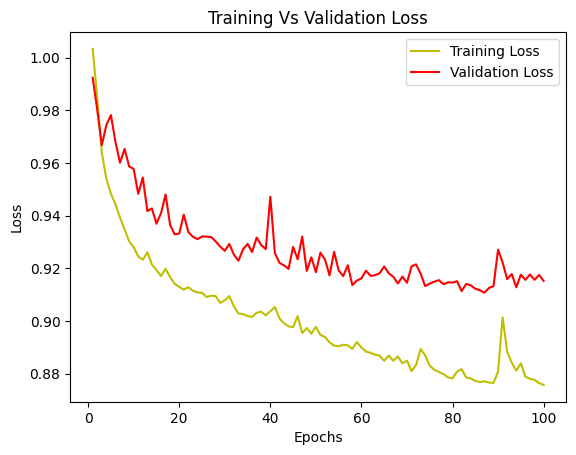

In [76]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

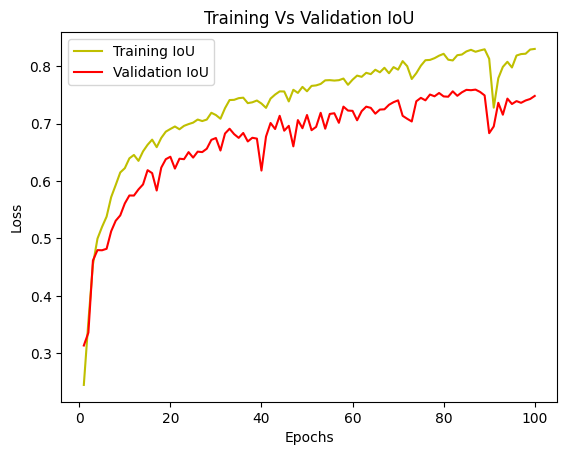

In [77]:
Jaccard_coef = history_a.history['Jaccard_coef']
val_Jaccard_coef = history_a.history['val_Jaccard_coef']

epochs = range(1, len(Jaccard_coef) + 1)
plt.plot(epochs, Jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_Jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [78]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 51}

In [79]:
y_pred = model.predict(x_test)

5/5 [==============================] - 2s 358ms/step


In [80]:
len(y_pred)

142

In [81]:
y_pred

array([[[[4.29180451e-03, 8.05472076e-01, 8.10535103e-02,
          6.76127747e-02, 3.96964103e-02, 1.87347783e-03],
         [1.31027563e-03, 8.94755363e-01, 5.15694320e-02,
          3.19255330e-02, 2.02350989e-02, 2.04362572e-04],
         [1.51117565e-03, 8.98625553e-01, 5.12004197e-02,
          2.57692542e-02, 2.27684341e-02, 1.25089544e-04],
         ...,
         [1.65006111e-03, 8.46557617e-01, 9.09278169e-02,
          4.97840568e-02, 1.06859533e-02, 3.94475413e-04],
         [2.99459323e-03, 7.99138725e-01, 1.22284859e-01,
          6.21919483e-02, 1.27939712e-02, 5.96000173e-04],
         [1.93200745e-02, 6.19966745e-01, 2.22173348e-01,
          9.89234969e-02, 3.76063362e-02, 2.01002206e-03]],

        [[2.02094764e-03, 8.64760876e-01, 7.82726631e-02,
          2.95918044e-02, 2.52080597e-02, 1.45592057e-04],
         [7.93078681e-04, 9.29578960e-01, 4.31422256e-02,
          1.29992049e-02, 1.34714590e-02, 1.50682708e-05],
         [8.47017975e-04, 9.31351662e-01, 3.6183

In [82]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [83]:
len(y_pred_argmax)

142

In [84]:
y_pred_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 2, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [85]:
y_test_argmax = np.argmax(y_test, axis=3)

In [86]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

#Comparing prediction results
###using test images using mask images and predicted result images..

In [87]:
import random

In [88]:
test_image_number = random.randint(0, len(x_test))

test_image = x_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]


1/1 [==============================] - 0s 51ms/step


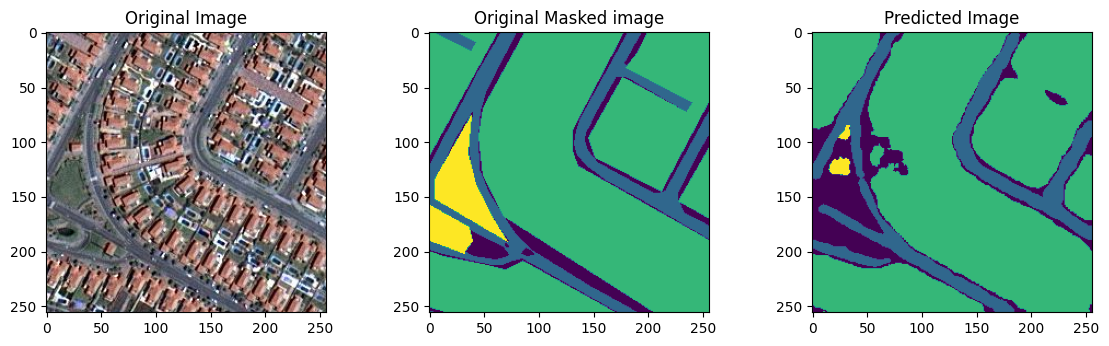

In [89]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [90]:
model.save("satellite_segmentation_full.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [91]:
!ls -lah

total 23M
drwxr-xr-x 1 root root 4.0K Aug 29 08:56 .
drwxr-xr-x 1 root root 4.0K Aug 29 06:34 ..
drwxr-xr-x 4 root root 4.0K Aug 27 13:19 .config
drwx------ 5 root root 4.0K Aug 29 06:36 drive
drwxr-xr-x 1 root root 4.0K Aug 27 13:20 sample_data
-rw-r--r-- 1 root root  23M Aug 29 08:56 satellite_segmentation_full.h5
